# ANALISIS EPECTRAL

## PREPROCESAMIENTO

In [ ]:
import pandas as pd
import numpy as np

# Cargar datos
df = pd.read_csv("TIME_SERIES_DATASET/FX.csv", parse_dates=["Local time"], index_col="Local time")

# Interpolación para equiespaciado (opcionaDl si hay tiempos irregulares)
df = df.resample("1S").interpolate()

# Normalización
#df["Close_norm"] = (df["Close"] - df["Close"].mean()) / df["Close"].std()
df["Close_norm"] = (df["Close"] - df["Close"].mean()) / df["Close"].std()
print(df.head())  # Verifica si la columna "Close_norm" aparece



C:\Users\gutie\AppData\Local\Temp\ipykernel_35368\2972140543.py:5: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S.%f GMT%z format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("TIME_SERIES_DATASET/FX.csv", parse_dates=["Local time"], index_col="Local time")


                               Open     High       Low    Close  Volume  \
Local time                                                                
2025-01-23 00:00:01-06:00  1.040500  1.04050  1.040500  1.04050    2.70   
2025-01-23 00:00:02-06:00  1.040490  1.04049  1.040490  1.04049    1.80   
2025-01-23 00:00:03-06:00  1.040485  1.04049  1.040485  1.04049    4.50   
2025-01-23 00:00:04-06:00  1.040480  1.04049  1.040480  1.04049    7.20   
2025-01-23 00:00:05-06:00  1.040485  1.04049  1.040485  1.04049    4.05   

                           Close_norm  
Local time                             
2025-01-23 00:00:01-06:00   -0.302250  
2025-01-23 00:00:02-06:00   -0.311623  
2025-01-23 00:00:03-06:00   -0.311623  
2025-01-23 00:00:04-06:00   -0.311623  
2025-01-23 00:00:05-06:00   -0.311623  


C:\Users\gutie\AppData\Local\Temp\ipykernel_35368\2972140543.py:8: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df = df.resample("1S").interpolate()


In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Cargar señal de audio
audio_path = "DATASET_VOZ/sample-000000.mp3"
y, sr = librosa.load(audio_path, sr=None, mono=True)

# Normalizar amplitud
y = y / np.max(np.abs(y))


## ANALISIS ESPECTRAL

### SERIE TEMPORAL-FINANCIERA

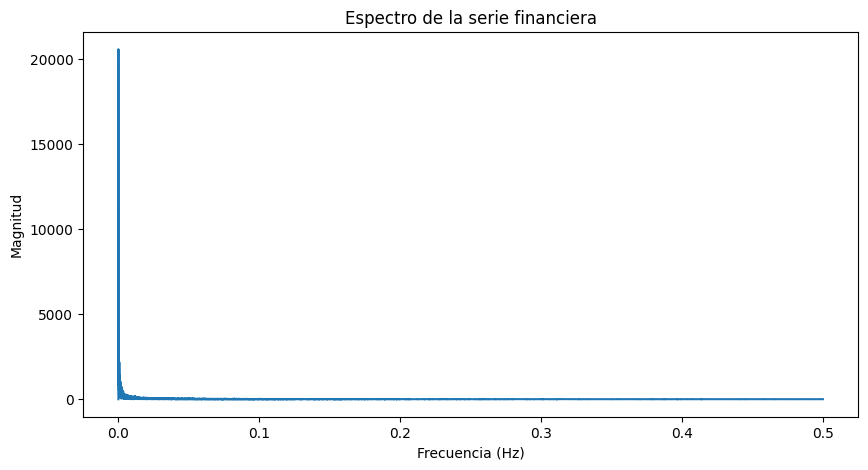

In [9]:
from scipy.fftpack import fft, fftfreq

# Aplicar FFT
N = len(df["Close_norm"])
T = 1  # Suponiendo datos a 1Hz tras interpolación
freqs = fftfreq(N, T)
fft_values = fft(df["Close_norm"].to_numpy())


# Graficar espectro
plt.figure(figsize=(10,5))
plt.plot(freqs[:N//2], np.abs(fft_values[:N//2]))  # Solo mitad positiva
plt.title("Espectro de la serie financiera")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.show()


### SEÑAL DE VOZ

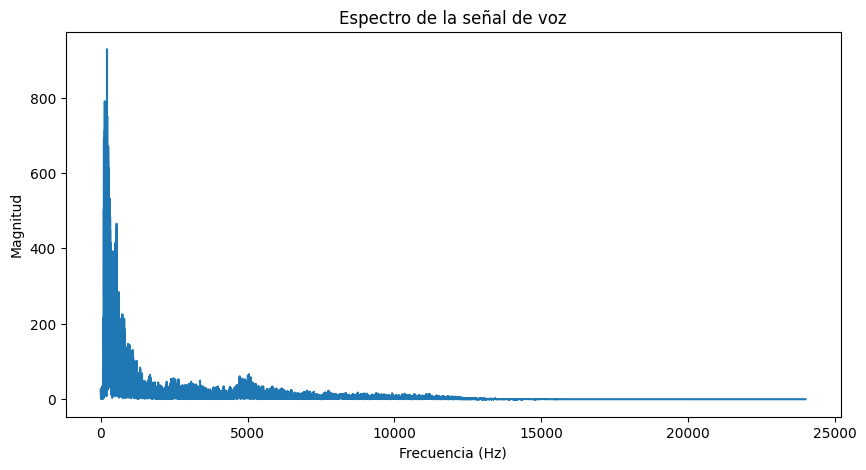

In [10]:
import numpy as np
import scipy.signal as sg

# FFT de la señal de audio
fft_audio = np.fft.fft(y)
freqs_audio = np.fft.fftfreq(len(y), 1/sr)

# Graficar espectro
plt.figure(figsize=(10,5))
plt.plot(freqs_audio[:len(y)//2], np.abs(fft_audio[:len(y)//2]))
plt.title("Espectro de la señal de voz")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.show()


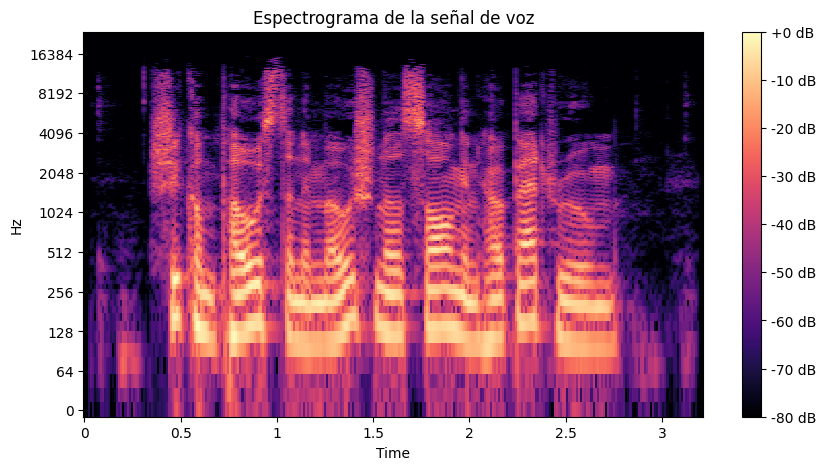

In [11]:
import librosa.display

# Espectrograma con STFT
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

plt.figure(figsize=(10, 5))
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Espectrograma de la señal de voz")
plt.show()


Comparación y Análisis
Frecuencias dominantes: ¿En qué rangos están las principales componentes de cada señal?
Diferencias en la forma espectral:
La serie financiera debería tener más actividad en bajas frecuencias.
La señal de voz tendrá frecuencias características de habla (100 Hz - 4 kHz).
Interpretación de resultados:
¿Existen patrones cíclicos en la serie financiera?
¿Cómo cambia el espectro de la voz con el tiempo?

### SERIE FINANCIERA

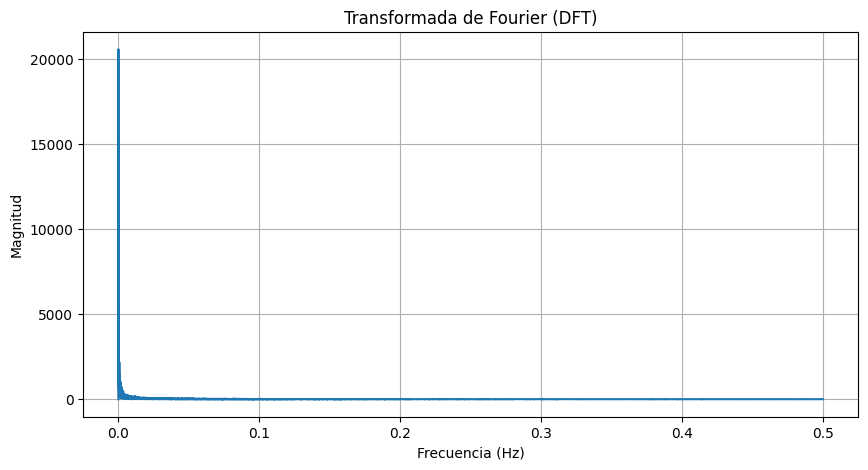

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parámetros
N = len(df)
T = 1  # Suponiendo 1 Hz tras interpolación

# FFT
fft_values = fft(df["Close_norm"].to_numpy())
freqs = fftfreq(N, T)

# Visualización de DFT
plt.figure(figsize=(10, 5))
plt.plot(freqs[:N // 2], np.abs(fft_values[:N // 2]))  # Solo la mitad positiva
plt.title("Transformada de Fourier (DFT)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid()
plt.show()


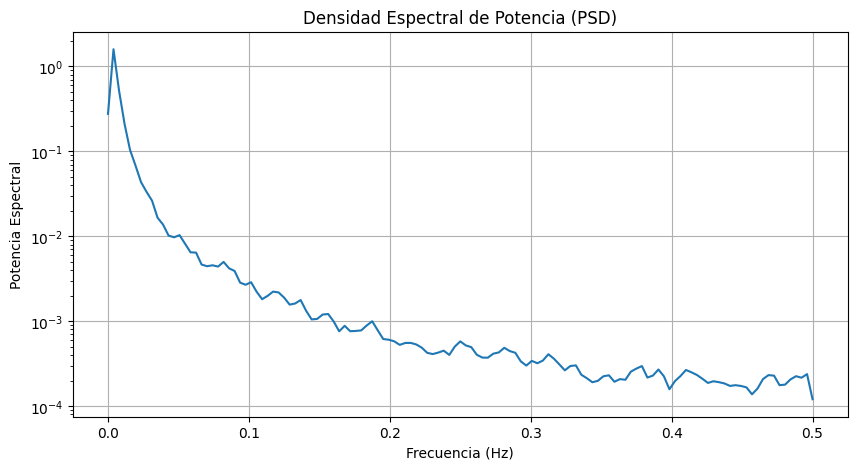

In [13]:
from scipy.signal import welch

# PSD con método de Welch
freqs_psd, psd_values = welch(df["Close_norm"].to_numpy(), fs=1, nperseg=256)

# Visualización de PSD
plt.figure(figsize=(10, 5))
plt.semilogy(freqs_psd, psd_values)  # Escala logarítmica
plt.title("Densidad Espectral de Potencia (PSD)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Potencia Espectral")
plt.grid()
plt.show()


c:\Users\gutie\IA\ANALITICA DE DATOS\AD\Lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


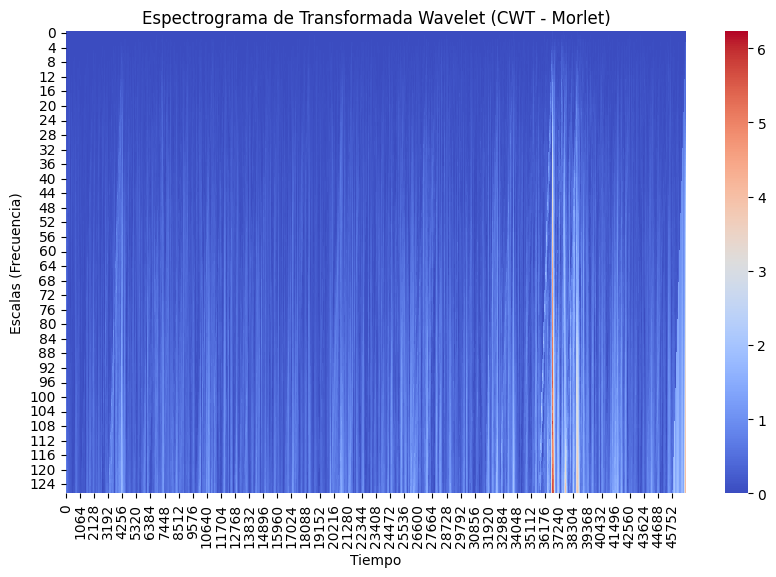

In [14]:
import pywt
import seaborn as sns

# Definir escalas y aplicar Wavelet de Morlet
scales = np.arange(1, 128)
coefficients, frequencies = pywt.cwt(df["Close_norm"].to_numpy(), scales, 'cmor', 1)

# Visualización Wavelet
plt.figure(figsize=(10, 6))
sns.heatmap(np.abs(coefficients), cmap="coolwarm", cbar=True)
plt.title("Espectrograma de Transformada Wavelet (CWT - Morlet)")
plt.xlabel("Tiempo")
plt.ylabel("Escalas (Frecuencia)")
plt.show()


### SEÑAL DE VOZ

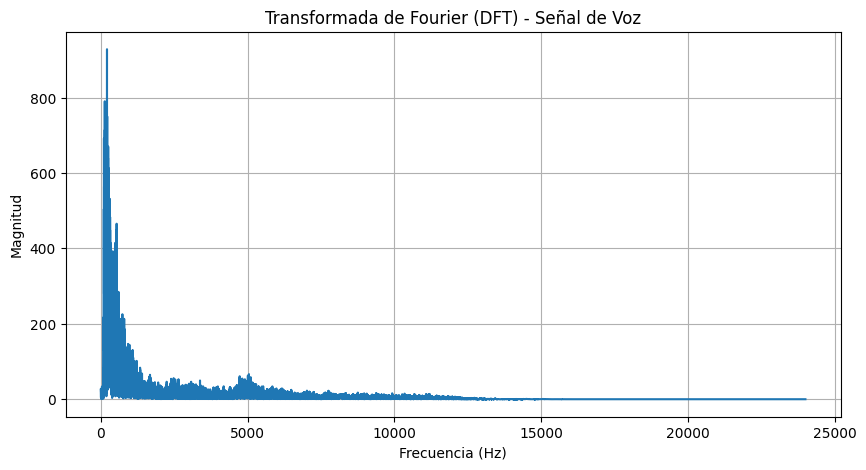

In [15]:
from scipy.fft import fft, fftfreq
import numpy as np

# DFT: Convertir la señal a frecuencia
N = len(y)
T = 1.0 / sr  # Inversa de la tasa de muestreo (sampling rate)

# FFT
fft_values = fft(y)
freqs = fftfreq(N, T)

# Visualización de DFT
plt.figure(figsize=(10, 5))
plt.plot(freqs[:N // 2], np.abs(fft_values[:N // 2]))  # Solo la mitad positiva
plt.title("Transformada de Fourier (DFT) - Señal de Voz")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid()
plt.show()


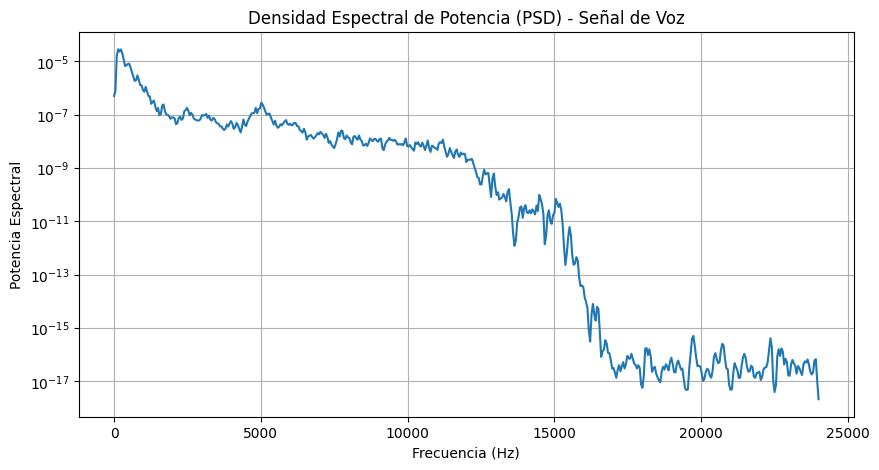

In [16]:
from scipy.signal import welch

# PSD con método de Welch
freqs_psd, psd_values = welch(y, fs=sr, nperseg=1024)

# Visualización de PSD
plt.figure(figsize=(10, 5))
plt.semilogy(freqs_psd, psd_values)  # Escala logarítmica
plt.title("Densidad Espectral de Potencia (PSD) - Señal de Voz")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Potencia Espectral")
plt.grid()
plt.show()


c:\Users\gutie\IA\ANALITICA DE DATOS\AD\Lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


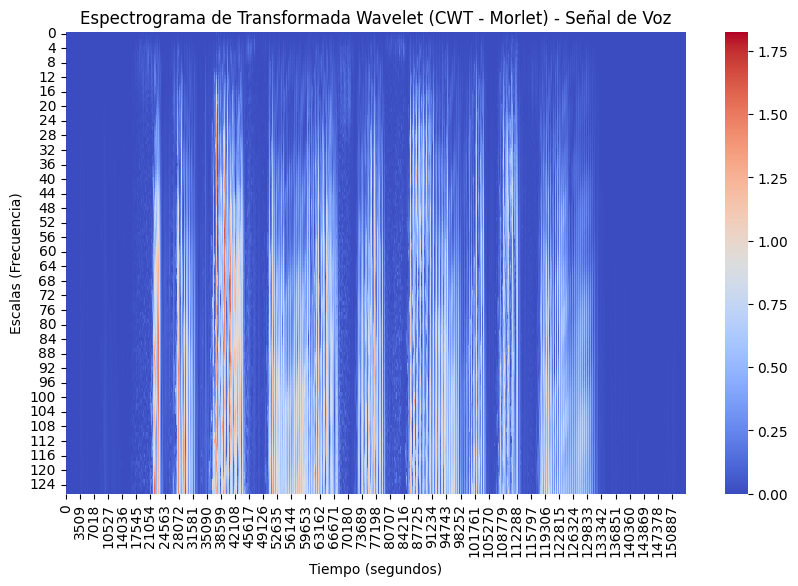

In [17]:
import pywt
import seaborn as sns

# Definir escalas y aplicar Wavelet de Morlet
scales = np.arange(1, 128)
coefficients, frequencies = pywt.cwt(y, scales, 'cmor', 1.0 / sr)

# Visualización Wavelet
plt.figure(figsize=(10, 6))
sns.heatmap(np.abs(coefficients), cmap="coolwarm", cbar=True)
plt.title("Espectrograma de Transformada Wavelet (CWT - Morlet) - Señal de Voz")
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Escalas (Frecuencia)")
plt.show()
